<a href="https://colab.research.google.com/github/satro1/ML_Projects/blob/main/00_MultiLinearRegression/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset from Kaggle

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USER"] = userdata.get('KAGGLE_USER')

!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression
! unzip "student-performance-multiple-linear-regression.zip"

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
student-performance-multiple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-performance-multiple-linear-regression.zip
replace Student_Performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Performance.csv  


## Read the dataset and convert boolean column into binary 0/1 numerical

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Performance.csv')
print("Num records:", len(df))
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.head()

Num records: 10000


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Visualize the dataset

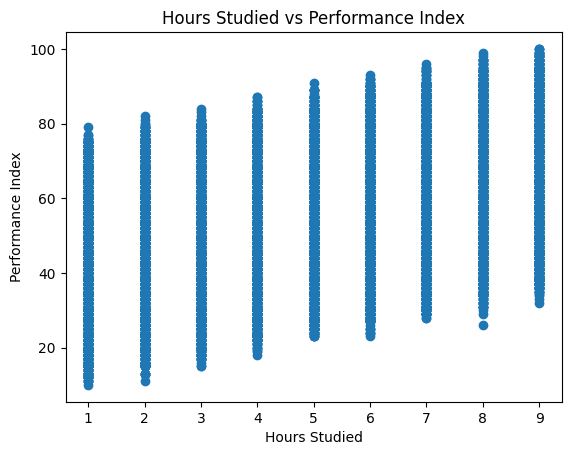

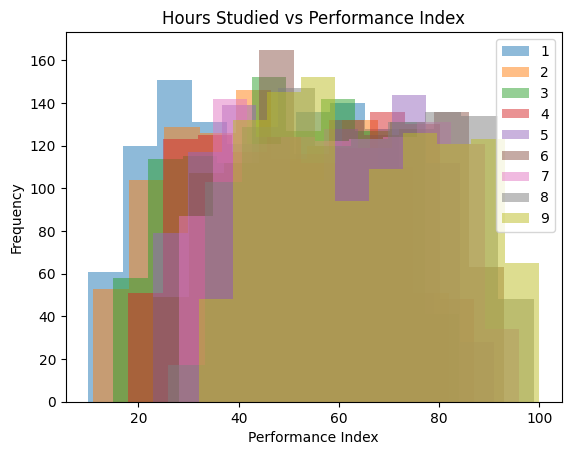

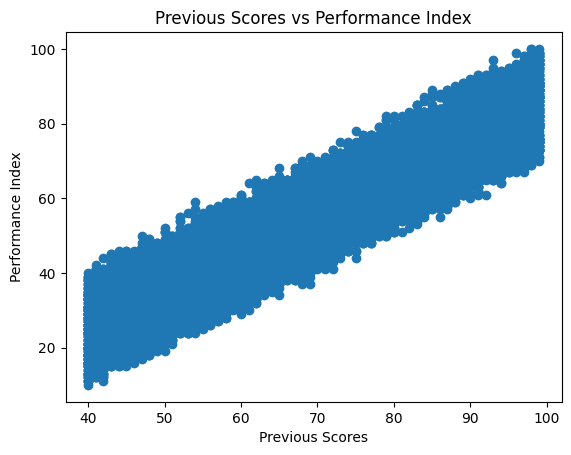

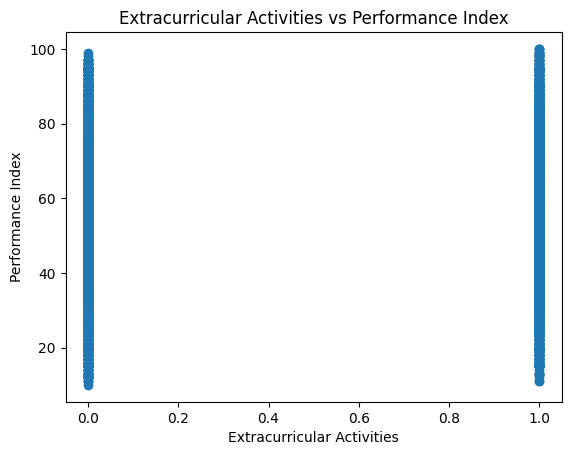

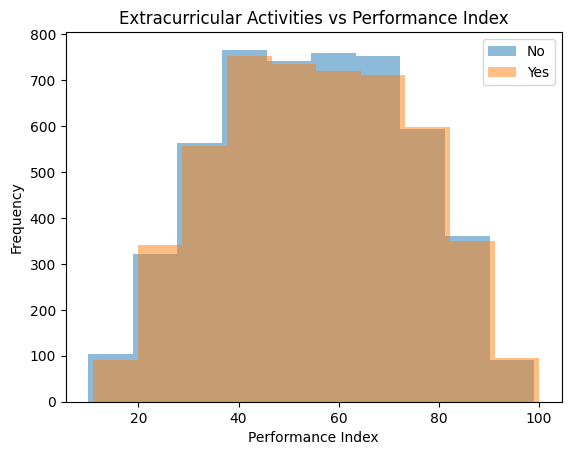

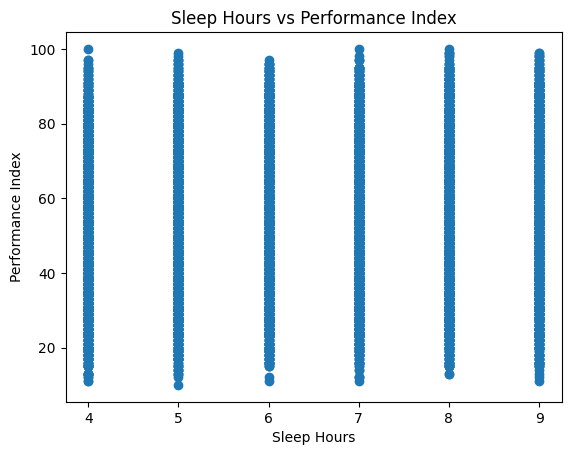

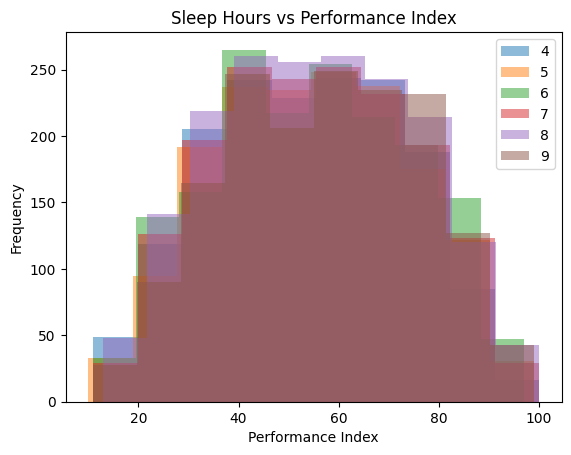

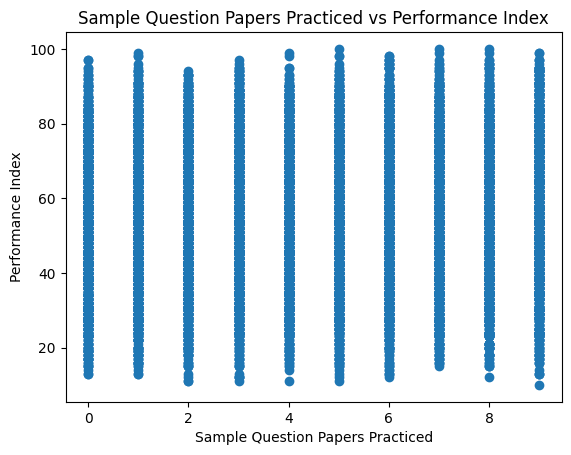

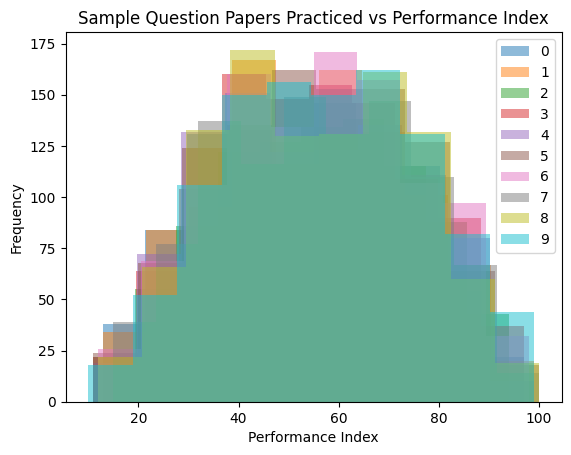

In [ ]:
def plot(title, x, y, xlabel, ylabel):
  plt.figure()
  plt.title(title)
  plt.scatter(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def plot_histograms(title, df, x, y, bins, labels):
  plt.figure()
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel("Frequency")
  for i in range(len(bins)):
    plt.hist(df[df[y] == bins[i]][x], alpha=0.5)
  plt.legend(labels)
  plt.show()

plot('Hours Studied vs Performance Index', df['Hours Studied'], df['Performance Index'], 'Hours Studied', 'Performance Index')
plot_histograms("Hours Studied vs Performance Index", df, "Performance Index", "Hours Studied", range(1, 10), list(map(lambda x: str(x), range(1, 10))))

plot('Previous Scores vs Performance Index', df['Previous Scores'], df['Performance Index'], 'Previous Scores', 'Performance Index')

plot('Extracurricular Activities vs Performance Index', df['Extracurricular Activities'], df['Performance Index'], 'Extracurricular Activities', 'Performance Index')
plot_histograms("Extracurricular Activities vs Performance Index", df, "Performance Index", "Extracurricular Activities", [0, 1], ["No", "Yes"])

plot('Sleep Hours vs Performance Index', df['Sleep Hours'], df['Performance Index'], 'Sleep Hours', 'Performance Index')
plot_histograms("Sleep Hours vs Performance Index", df, "Performance Index", "Sleep Hours", range(4, 10), list(map(lambda x: str(x), range(4, 10))))

plot('Sample Question Papers Practiced vs Performance Index', df['Sample Question Papers Practiced'], df['Performance Index'], 'Sample Question Papers Practiced', 'Performance Index')
plot_histograms("Sample Question Papers Practiced vs Performance Index", df, "Performance Index", "Sample Question Papers Practiced", range(0, 10), list(map(lambda x: str(x), range(0, 10))))

## Prepare the data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']])
Y = np.array(df['Performance Index']).reshape(-1, 1)
print("X shape", X.shape)
print("Y shape", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("m =", X_train.shape[1])
print("n =", X_train.shape[0])


X shape (10000, 5)
Y shape (10000, 1)
X_train shape (8000, 5)
Y_train shape (8000, 1)
X_test shape (2000, 5)
Y_test shape (2000, 1)
m = 5
n = 8000


## Model this relationshop using Multi Linear Regression
y = a$_1$x$_1$ + a$_2$x$_2$ + a$_3$x$_3$ + a$_4$x$_4$ +a$_5$x$_5$ + b\
$\implies$
$\vec{Y}$ = $\begin{bmatrix}x_{11} & ... & x_{1m} \\ ... & ... & ... \\ x_{n1} & ... & x_{nm}\end{bmatrix}$$\begin{bmatrix}a_1\\...\\a_m\end{bmatrix}$ + $\begin{bmatrix}b\\...\\b\end{bmatrix}$\
$\implies$
$\vec{Y}$ = $\begin{bmatrix}1 & x_{11} & ... & x_{1m} \\ ... & ... & ... & ... \\ 1 & x_{n1} & ... & x_{nm}\end{bmatrix}$$\begin{bmatrix}b\\a_1\\...\\a_m\end{bmatrix}$\
$\implies$
$\vec{Y}$ = X$\vec{A}$\
Using Least Squares:\
$\widehat{\vec{A}}$ = (X$^T$X)$^{-1}$X$^T$$\vec{Y}$ and\
$\widehat{\vec{Y}}$ = X$\widehat{\vec{A}}$

In [ ]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
A_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), Y_train)
print("Weights:\n", A_hat)

Weights:
 [[-33.92194622]
 [  2.85248393]
 [  1.0169882 ]
 [  0.60861668]
 [  0.47694148]
 [  0.19183144]]


## Test the model

In [ ]:
Y_hat = np.dot(X_test, A_hat)
print("Predicted:\n", Y_hat)
print("Actual:\n", Y_test)
errors = np.abs(Y_hat - Y_test)
print("Errors:\n", errors)
print("Mean error:", np.mean(errors))

Predicted:
 [[54.71185392]
 [22.61551294]
 [47.90314471]
 ...
 [16.79341955]
 [63.34327368]
 [45.94262301]]
Actual:
 [[51.]
 [20.]
 [46.]
 ...
 [16.]
 [65.]
 [47.]]
Errors:
 [[3.71185392]
 [2.61551294]
 [1.90314471]
 ...
 [0.79341955]
 [1.65672632]
 [1.05737699]]
Mean error: 1.6111213463123097


## Plot residual error

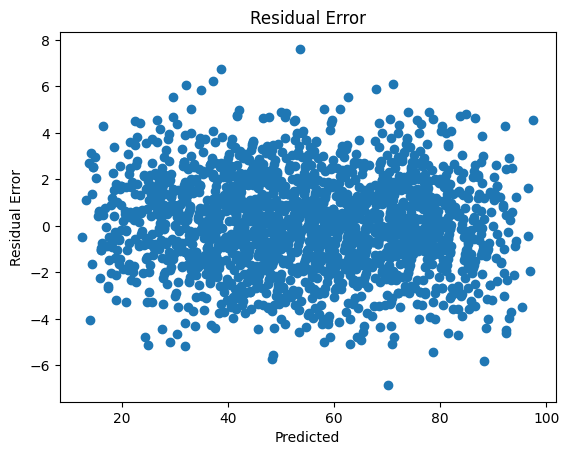

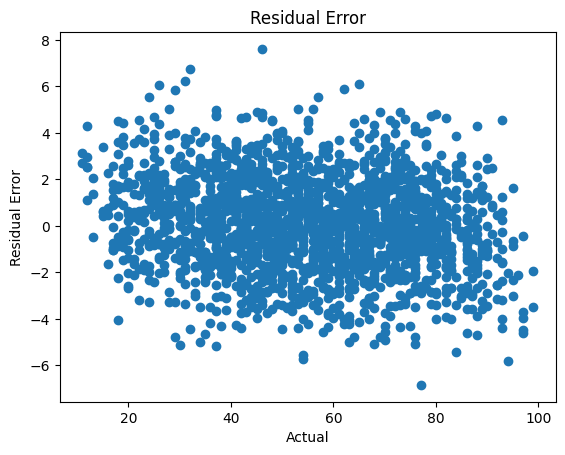

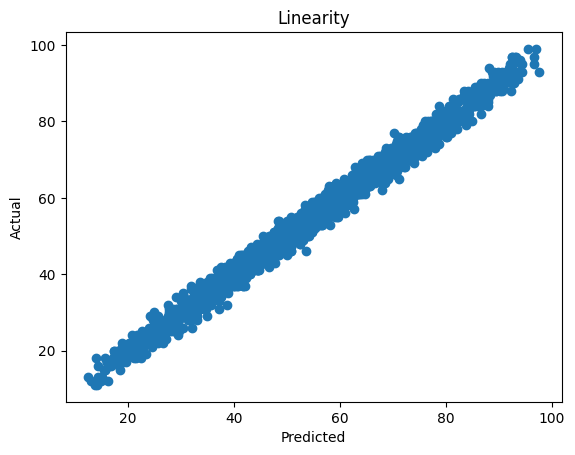

In [ ]:
plot("Residual Error", Y_hat, Y_hat - Y_test, "Predicted", "Residual Error")
plot("Residual Error", Y_test, Y_hat - Y_test, "Actual", "Residual Error")
plot("Linearity", Y_hat, Y_test, "Predicted", "Actual")